# Database intro
## Postgres install via conda (the lazy way)

1. make an user for the database, low uid as not to mess with the Meta Kerberos; if this were an actual server you should make him nologin, etc etc

2. log the user

3. go to home folder, install conda, create the environment, you know the drill

4. make a fokder for the database, go to that folder

5. initialize pslq database in the folder

6. start the database process

7. lets's login into the database, create a new database, create new user for script access with very secure password, give rights to the user, connect to database, logout

8. create the extension. May result in messed up dependencies, downgrade conda packages as needed.

## Creating tables
can be done interactively in psql console, bud I definitely recommend keeping all the commands necessary to completely build/rebuild the database schema in a standalone sql script. In this example, it's the reset_drugbank.sql file. The script can be ran straight from bash:

## Connecting to the database

also, you might need to also install psycopg2 into conda:

, just in case you don't hate me enough yet :)

In [1]:
from rdkit.Chem import AllChem as Chem
import psycopg2 as pg
import pickle
import rdkit.Chem.Draw as Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
c = pg.connect("dbname=drugbank user=script password=pnl") # create a connection

In [3]:
cursor = c.cursor() # grab a connection cursor

In [4]:
cursor.execute("select mol_numatoms('CCO'::mol)") # test the rdkit cartridge functionality
cursor.fetchall()

[(9,)]

In [5]:
c.rollback() # run in case of transaction block

Connection looks ok, rdkit cartridge runs. Let's load drugbank into the database:
## Filling the database

In [6]:
suppl = Chem.SDMolSupplier("../cdd2019/data/drugbank.sdf")
drugbank = [m for m in suppl if m]

RDKit ERROR: [11:42:07] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [11:42:07] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [11:42:07] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [11:42:07] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [11:42:07] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [11:42:07] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [11:42:07] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [11:42:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [11:42:07] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [11:42:07] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [11:42:07] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [11:42:07] Can't kek

RDKit ERROR: [11:42:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [11:42:08] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [11:42:08] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [11:42:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [11:42:08] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [11:42:08] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [11:42:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [11:42:08] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [11:42:08] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [11:42:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [11:42:08] Explicit valence for atom # 53 N, 4, is greater than pe

RDKit ERROR: [11:42:08] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [11:42:09] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [11:42:09] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [11:42:09] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [11:42:09] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [11:42:09] ERROR: Could not sanitize molecule ending on line 1151592


In [7]:
len(drugbank)

7113

In [8]:
possible_columns = set()
for m in drugbank:
    possible_columns.update(m.GetPropsAsDict())
possible_columns

{'ALOGPS_LOGP',
 'ALOGPS_LOGS',
 'ALOGPS_SOLUBILITY',
 'DATABASE_ID',
 'DATABASE_NAME',
 'DRUGBANK_ID',
 'DRUG_GROUPS',
 'EXACT_MASS',
 'FORMULA',
 'GENERIC_NAME',
 'INCHI_IDENTIFIER',
 'INCHI_KEY',
 'INTERNATIONAL_BRANDS',
 'JCHEM_ACCEPTOR_COUNT',
 'JCHEM_ATOM_COUNT',
 'JCHEM_AVERAGE_POLARIZABILITY',
 'JCHEM_BIOAVAILABILITY',
 'JCHEM_DONOR_COUNT',
 'JCHEM_FORMAL_CHARGE',
 'JCHEM_GHOSE_FILTER',
 'JCHEM_IUPAC',
 'JCHEM_LOGP',
 'JCHEM_MDDR_LIKE_RULE',
 'JCHEM_NUMBER_OF_RINGS',
 'JCHEM_PHYSIOLOGICAL_CHARGE',
 'JCHEM_PKA',
 'JCHEM_PKA_STRONGEST_ACIDIC',
 'JCHEM_PKA_STRONGEST_BASIC',
 'JCHEM_POLAR_SURFACE_AREA',
 'JCHEM_REFRACTIVITY',
 'JCHEM_ROTATABLE_BOND_COUNT',
 'JCHEM_RULE_OF_FIVE',
 'JCHEM_TRADITIONAL_IUPAC',
 'JCHEM_VEBER_RULE',
 'MOLECULAR_WEIGHT',
 'PRODUCTS',
 'SALTS',
 'SECONDARY_ACCESSION_NUMBERS',
 'SMILES',
 'SYNONYMS'}

This is what is in the sdf. Let's discuss how to best represent it in a relational database...

In [9]:
molecule_columns = (
 'ALOGPS_LOGP',
 'ALOGPS_LOGS',
 'ALOGPS_SOLUBILITY',
 'DATABASE_ID',
 'DATABASE_NAME',
 'DRUGBANK_ID',
 'EXACT_MASS',
 'FORMULA',
 'INCHI_IDENTIFIER',
 'INCHI_KEY',
 'JCHEM_ACCEPTOR_COUNT',
 'JCHEM_ATOM_COUNT',
 'JCHEM_AVERAGE_POLARIZABILITY',
 'JCHEM_BIOAVAILABILITY',
 'JCHEM_DONOR_COUNT',
 'JCHEM_FORMAL_CHARGE',
 'JCHEM_GHOSE_FILTER',
 'JCHEM_IUPAC',
 'JCHEM_LOGP',
 'JCHEM_MDDR_LIKE_RULE',
 'JCHEM_NUMBER_OF_RINGS',
 'JCHEM_PHYSIOLOGICAL_CHARGE',
 'JCHEM_PKA',
 'JCHEM_PKA_STRONGEST_ACIDIC',
 'JCHEM_PKA_STRONGEST_BASIC',
 'JCHEM_POLAR_SURFACE_AREA',
 'JCHEM_REFRACTIVITY',
 'JCHEM_ROTATABLE_BOND_COUNT',
 'JCHEM_RULE_OF_FIVE',
 'JCHEM_TRADITIONAL_IUPAC',
 'JCHEM_VEBER_RULE',
 'MOLECULAR_WEIGHT',
 'SMILES')

In [10]:
def molecule2insertstring(m, columns):
    values = ['null'] * len(columns)
    for i, c in enumerate(columns):
        try:
            values[i] = "'{}'".format(m.GetProp(c).replace("'", "''"))
        except KeyError:
            pass
    return '({})'.format(", ".join(values))

In [11]:
molecule2insertstring(drugbank[666], molecule_columns)

"('2.66', '-6.75', '7.22e-05 g/l', 'DB00782', 'drugbank', 'DB00782', '368.222568831', 'C23H30NO3', 'InChI=1S/C23H30NO3/c1-16(2)24(5,17(3)4)14-15-26-23(25)22-18-10-6-8-12-20(18)27-21-13-9-7-11-19(21)22/h6-13,16-17,22H,14-15H2,1-5H3/q+1', 'VVWYOYDLCMFIEM-UHFFFAOYSA-N', '1', null, '40.86703349207315', '1', '0', '1', '1', 'methylbis(propan-2-yl)[2-(9H-xanthene-9-carbonyloxy)ethyl]azanium', '0.3637936438615875', '1', '3', '1', null, '18.098024207383688', '-7.185977917412988', '35.53', '119.25450000000001', '7', '1', 'propantheline', '1', '368.4892', 'CC(C)[N+](C)(CCOC(=O)C1C2=CC=CC=C2OC2=CC=CC=C12)C(C)C')"

In [12]:
molecules_insert_query = "insert into drugbank.molecule ({}) values {};".format(', '.join(molecule_columns),
                                                                                ', '.join([molecule2insertstring(m, molecule_columns) for m in drugbank]))

In [13]:
cursor.execute(molecules_insert_query) # execute this query
c.commit() # commit the changes

In [14]:
cursor.execute("select * from drugbank.molecule limit 10")
cursor.fetchall()

[(1,
  None,
  None,
  -0.76,
  -4.67,
  '4.64e-02 g/l',
  'DB00006',
  'drugbank',
  'DB00006',
  2178.99,
  'C98H138N24O33',
  'InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122-39-15-23-70(122)92(149)114-60(30-34-79(134)135)85(142)111-59(29-33-78(132)133)86(143)116-64(43-55-24-26-56(123)27-25-55)89(146)118-67(97(154)155)40-51(2)3)119-87(144)61(31-35-80(136)137)112-84(141)58(28-32-77(130)131)113-88(145)63(42-54-18-10-7-11-19-54)117-90(147)66(45-81(138)139)110-76(129)50-107-83(140)65(44-71(100)124)109-75(128)49-106-73(126)47-104-72(125)46-105-74(127)48-108-91(148)68-21-13-38-121(68)95(152)62(20-12-36-103-98(101)102)115-93(150)69-22-14-37-120(69)94(151)57(99)41-53-16-8-6-9-17-53/h6-11,16-19,24-27,51-52,57-70,82,123H,5,12-15,20-23,28-50,99H2,1-4H3,(H2,100,124)(H,104,125)(H,105,127)(H,106,126)(H,107,140)(H,108,148)(H,109,128)(H,110,129)(H,111,142)(H,112,141)(H,113,145)(H,114,149)(H,115,150)(H,116,143)(H,117,147)(H,118,146)(H,119,144)(H,130,131)(H,132,133)(H,134,135)(H,136,137)(H,138,139)(H,

## Populating the DB with rdmol instances

In [15]:
cursor.execute("update drugbank.molecule set rdmol = mol_from_smiles(SMILES::cstring)")

In [16]:
c.commit()

In [17]:
cursor.execute("select id, rdmol, morganfp from drugbank.molecule limit 5")
cursor.fetchall()

[(2645, 'C[As](C)(=O)O', None),
 (7050, '[82Rb+].[Cl-]', None),
 (21, 'N[C@@H](CC(=O)O)C(=O)O', None),
 (22, 'NCCC[C@H](N)C(=O)O', None),
 (1,
  'CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(=O)O)NC(=O)CNC(=O)[C@H](CC(N)=O)NC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=N)N)NC(=O)[C@@H]1CCCN1C(=O)[C@H](N)Cc1ccccc1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CC(C)C)C(=O)O',
  None)]

## Creating fingerprints from rdmol instances

In [18]:
cursor.execute("update drugbank.molecule set morganfp = morganbv_fp(rdmol)")
c.commit()

In [19]:
cursor.execute("select id, rdmol, morganfp from drugbank.molecule limit 5")
cursor.fetchall()

[(2645,
  'C[As](C)(=O)O',
  '\\x00000008020000000000000000000000002400000000000000000000000000000000000080100000000000000000000000000080000000000000000080000000'),
 (7050,
  '[82Rb+].[Cl-]',
  '\\x00000000000000000000000000000000000000000000000000000000000000000000000000000000000400000000000100000000000000000000000000000000'),
 (21,
  'N[C@@H](CC(=O)O)C(=O)O',
  '\\x02000000000000004000010000002000000408000000000000020000000000000005040080001002000000000000002020000800000000000000000000000000'),
 (22,
  'NCCC[C@H](N)C(=O)O',
  '\\x02000000000000000000010000000000000408000000000000000000080000800000040080001102000000000000802020000810400000000000200000200000'),
 (7031,
  'O=C1CCO1',
  '\\x00000000000000000000000000000000000401000021000000040000000000000000000000000004000000001000000000000040000040020004000000000000')]

### Similarity search
let's try to find our good old friend aspirin
O=C(C)Oc1ccccc1C(=O)O

In [20]:
cursor.execute("select * from drugbank.molecule where morganfp%morganbv_fp('O=C(C)Oc1ccccc1C(=O)O')")
cursor.fetchall()

[(826,
  'CC(=O)Oc1ccccc1C(=O)O',
  '\\x00088000020000000100010000000000000400000080800002004000008000000000000080000000000002001000002024200000800004108001000000000002',
  1.43,
  -2.09,
  '1.46e+00 g/l',
  'DB00945',
  'drugbank',
  'DB00945',
  180.042,
  'C9H8O4',
  'InChI=1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)',
  'BSYNRYMUTXBXSQ-UHFFFAOYSA-N',
  3,
  None,
  17.0953,
  '1',
  1,
  '0',
  1,
  '2-(acetyloxy)benzoic acid',
  1.23809,
  '0',
  1,
  '-1',
  None,
  3.4148,
  -7.1448,
  63.6,
  44.4466,
  3,
  1,
  'aspirin',
  0,
  180.157,
  'CC(=O)OC1=CC=CC=C1C(O)=O'),
 (1215,
  'O=C(Oc1ccccc1C(=O)O)c1ccccc1O',
  '\\x00008000000000008500010000000001000402000080800802004000000000000000000080004000000002001000002024200000800084008001000000000000',
  3.44,
  -3.02,
  '2.46e-01 g/l',
  'DB01399',
  'drugbank',
  'DB01399',
  258.053,
  'C14H10O5',
  'InChI=1S/C14H10O5/c15-11-7-3-1-5-9(11)14(18)19-12-8-4-2-6-10(12)13(16)17/h1-8,15H,(H,16,17)',
  'WVYADZUPLLSGPU-U

That's cool, but we can do one better by grabbing the actual instances:

[(826, <memory at 0x7f4b4d57fe88>), (1215, <memory at 0x7f4b2f2e54c8>), (2423, <memory at 0x7f4b2f2e51c8>), (6630, <memory at 0x7f4b2f2e5648>)]


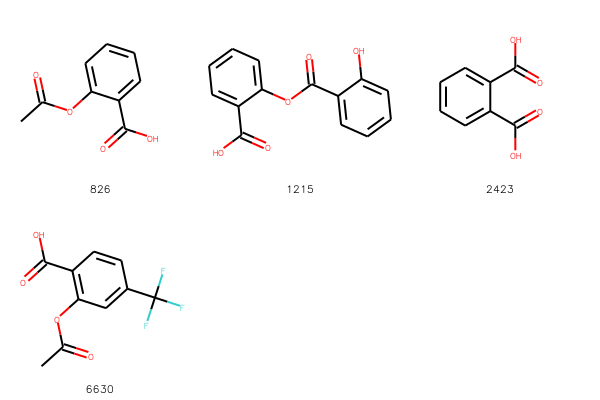

In [21]:
c.rollback()
cursor.execute("select id, mol_to_pkl(rdmol) from drugbank.molecule where morganfp%morganbv_fp('O=C(C)Oc1ccccc1C(=O)O')")
results = [(id, pkl) for id, pkl in cursor.fetchall()]
print(results)
hits = [Chem.Mol(pklb.tobytes()) for id, pklb in results]
Draw.MolsToGridImage(hits, legends=[str(id) for id, result in results])

With instances only:

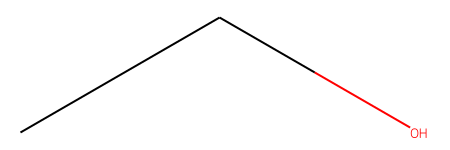

In [22]:
m = Chem.MolFromSmiles('CCO')
m

In [23]:
mbin = m.ToBinary()
mbin

b'\xef\xbe\xad\xde\x00\x00\x00\x00\n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x02\x00\x00\x00\x80\x01\x06\x00`\x00\x00\x00\x01\x03\x06\x00`\x00\x00\x00\x02\x02\x08\x00`\x00\x00\x00\x01\x01\x0b\x00\x01\x00\x01\x02\x00\x14\x00\x17\x00\x00\x00\x00\x16'

In [24]:
c.rollback()
cursor.execute("select mol_from_pkl({})".format(pg.Binary(mbin)))
cursor.fetchall()

[('CCO',)]

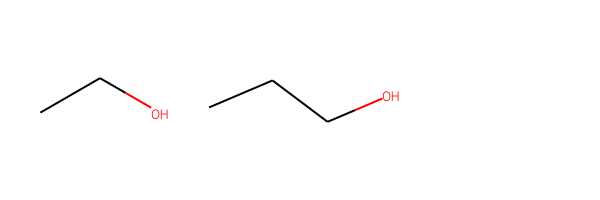

In [25]:
c.rollback()
cursor.execute("select id, mol_to_pkl(rdmol) from drugbank.molecule where morganfp%morganbv_fp(mol_from_pkl({}))".format(pg.Binary(mbin)))
hits = [Chem.Mol(pklb.tobytes()) for id, pklb in cursor.fetchall()]
Draw.MolsToGridImage(hits)

### Substructure search

orto-xylen: CC1=C(C)C=CC=C1

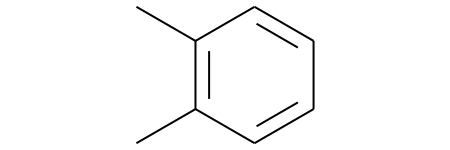

In [26]:
o_xylen = Chem.MolFromSmiles('CC1=C(C)C=CC=C1')
o_xylen

/root/miniconda3/envs/pnl2/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:183: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


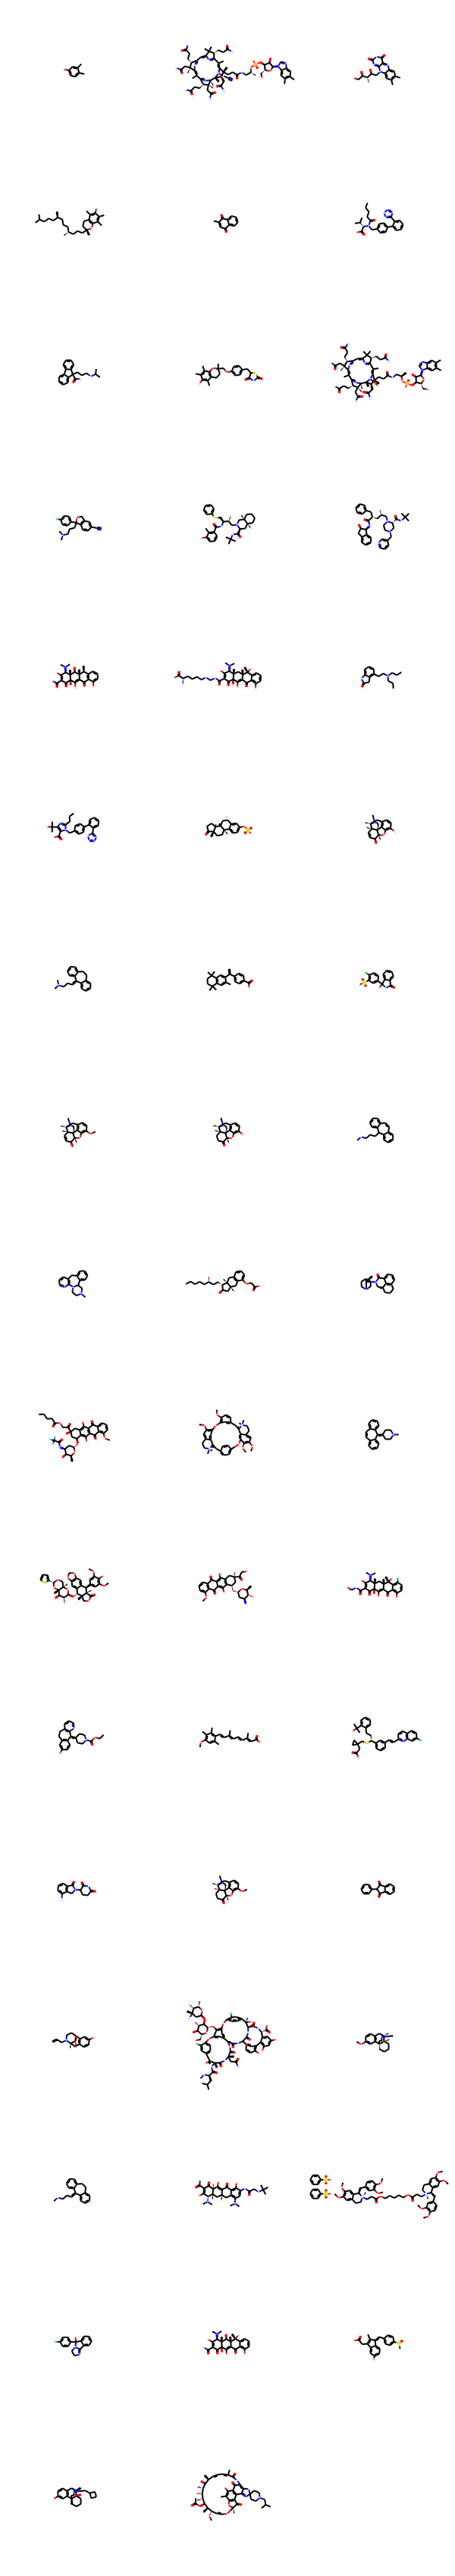

In [27]:
c.rollback()
cursor.execute("select id, mol_to_pkl(rdmol) from drugbank.molecule where rdmol@>mol_from_pkl({})".format(pg.Binary(o_xylen.ToBinary())))
hits = [Chem.Mol(pklb.tobytes()) for id, pklb in cursor.fetchall()]
Draw.MolsToGridImage(hits)

same as above, but sorted by atom count:

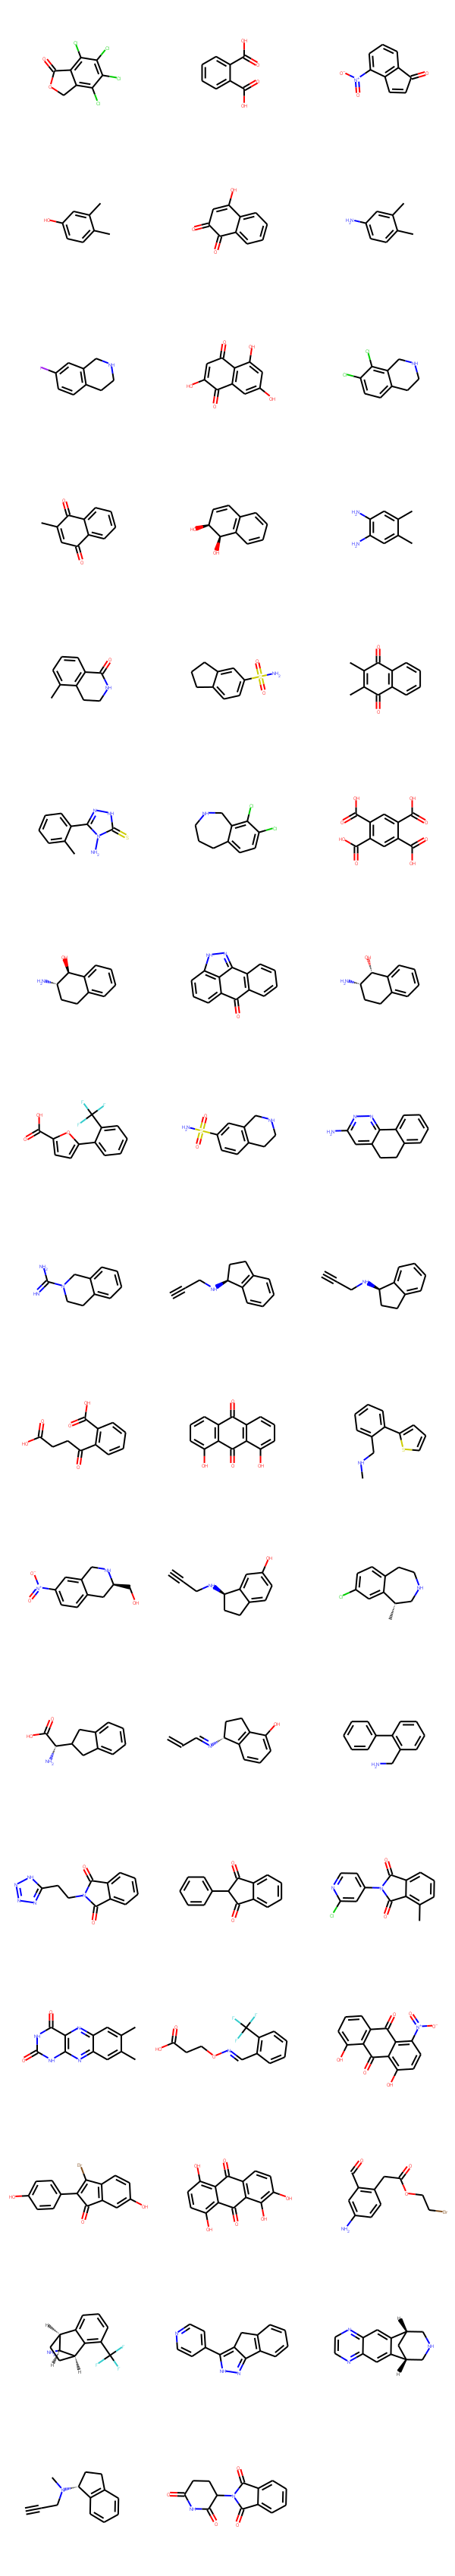

In [28]:
c.rollback()
cursor.execute("select id, mol_to_pkl(rdmol) from drugbank.molecule where rdmol@>mol_from_pkl({}) order by mol_numatoms(rdmol)".format(pg.Binary(o_xylen.ToBinary())))
hits = [Chem.Mol(pklb.tobytes()) for id, pklb in cursor.fetchall()]
Draw.MolsToGridImage(hits)

Any query is ok: :)

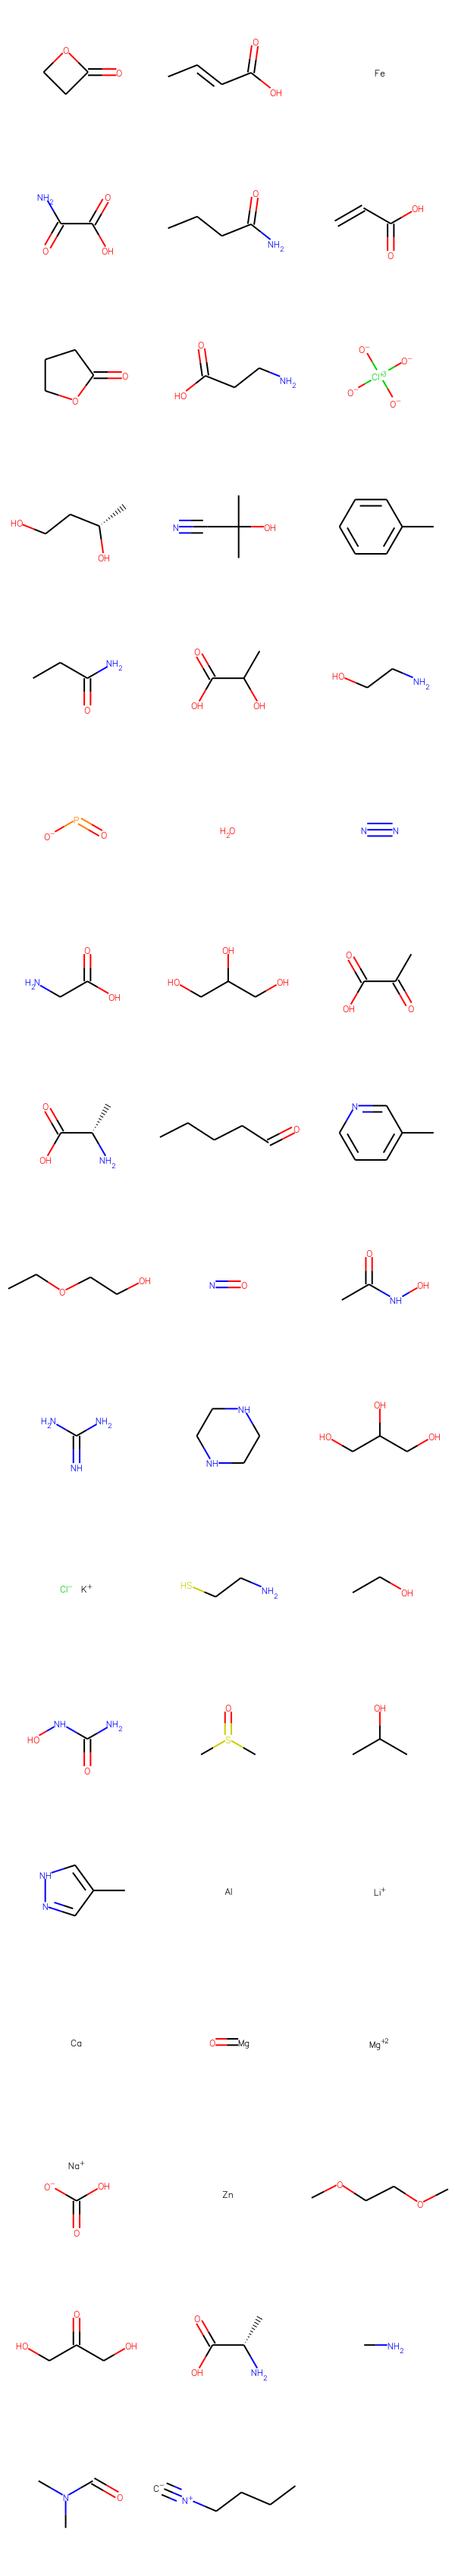

In [29]:
c.rollback()
cursor.execute("select id, mol_to_pkl(rdmol) from drugbank.molecule where EXACT_MASS < 100")
hits = [Chem.Mol(pklb.tobytes()) for id, pklb in cursor.fetchall()]
Draw.MolsToGridImage(hits)

## Creating other relational tables

In [30]:
for m in drugbank[:10]:
    dbid = m.GetProp('DATABASE_ID')
    name = m.GetProp('GENERIC_NAME')
    try:
        synonyms = m.GetProp('SYNONYMS')
    except KeyError:
        synonyms = None
    print(dbid, name, synonyms)

DB00006 Bivalirudin None
DB00014 Goserelin None
DB00035 Desmopressin 1-(3-mercaptopropionic acid)-8-D-arginine-vasopressin; 1-deamino-8-D-arginine vasopressin; 1-Desamino-8-D-arginine vasopressin; DDAVP; Desmopresina; Desmopressine; Desmopressinum
DB00050 Cetrorelix Cetrorelixum
DB00091 Cyclosporine Ciclosporin; Ciclosporina; Ciclosporine; Ciclosporinum; CsA; CyA; Cyclosporin; Cyclosporin A
DB00093 Felypressin 2-(L-phenylalanine)-8-L-lysinevasopressin; Felipresina; Felypressin; Felypressine; Felypressinum; PLV-2
DB00104 Octreotide Octreotida; Octreotidum; Octrotide
DB00114 Pyridoxal Phosphate 3-hydroxy-2-methyl-5-((phosphonooxy)methyl)-4-pyridinecarboxaldehyde; 3-hydroxy-5-(hydroxymethyl)-2-methylisonicotinaldehyde 5-phosphate; Codecarboxylase; PLP; Pyridoxal 5-monophosphoric acid ester; Pyridoxal 5-phosphate; Pyridoxal 5'-phosphate; Pyridoxal P; Pyridoxal phosphate anhydrous; Pyridoxal-5P; Pyridoxal-P
DB00115 Cyanocobalamin Cyanocob(III)alamin; Vitamin B12; Vitamin B12 complex
DB00116

In [31]:
cursor.execute("select id, DATABASE_ID from drugbank.molecule")
dbid2id = {dbid: id for id, dbid in cursor.fetchall()}
dbid2id

{'DB02994': 2645,
 'DB09479': 7050,
 'DB00128': 21,
 'DB00129': 22,
 'DB09348': 7031,
 'DB09420': 7041,
 'DB00895': 777,
 'DB00971': 851,
 'DB02074': 1812,
 'DB02252': 1969,
 'DB01592': 1379,
 'DB03940': 3497,
 'DB02121': 1856,
 'DB02579': 2271,
 'DB04592': 4081,
 'DB06715': 4632,
 'DB02956': 2610,
 'DB04699': 4176,
 'DB03107': 2745,
 'DB03138': 2771,
 'DB02202': 1929,
 'DB02203': 1930,
 'DB11558': 7074,
 'DB04161': 3698,
 'DB02811': 2479,
 'DB03553': 3143,
 'DB04398': 3913,
 'DB03993': 3546,
 'DB03994': 3547,
 'DB04018': 3569,
 'DB02327': 2038,
 'DB03600': 3182,
 'DB03976': 3529,
 'DB04052': 3601,
 'DB04053': 3602,
 'DB02838': 2504,
 'DB03462': 3065,
 'DB03554': 3144,
 'DB03610': 3192,
 'DB03694': 3270,
 'DB08809': 6627,
 'DB03754': 3323,
 'DB08913': 6689,
 'DB03947': 3504,
 'DB08848': 6654,
 'DB09145': 6865,
 'DB09152': 6872,
 'DB00117': 11,
 'DB00145': 38,
 'DB00155': 48,
 'DB00006': 1,
 'DB00014': 2,
 'DB00035': 3,
 'DB00050': 4,
 'DB00130': 23,
 'DB00166': 58,
 'DB00091': 5,
 'DB0

In [32]:
def molecule2nameinsertstrings(m, iddict):
    dbid = m.GetProp('DATABASE_ID')
    id = iddict[dbid]
    name = m.GetProp('GENERIC_NAME')
    inserttuples = [(id, name)]
    try:
        synonyms = m.GetProp('SYNONYMS').split('; ')
        for s in synonyms:
            inserttuples.append((id, s))
    except KeyError:
        pass
    return ", ".join(["('{}', '{}')".format(id, name.replace("'", "''")) for id, name in inserttuples])

In [33]:
molecule2nameinsertstrings(drugbank[666], dbid2id)

"('667', 'Propantheline'), ('667', 'Propantelina bromuro'), ('667', 'Propantelina, bromuro de'), ('667', 'Propanthelin bromid'), ('667', 'Propanthéline, bromure de'), ('667', 'Propanthelini Bromidum')"

In [34]:
insertstring = "insert into drugbank.name (molecule_id, name) values {};".format(
    ', '.join([molecule2nameinsertstrings(m, dbid2id) for m in drugbank]))

In [35]:
c.rollback()
cursor.execute(insertstring)
c.commit()

In [36]:
cursor.execute("select count(*) from drugbank.name")
cursor.fetchall()

[(14446,)]

In [37]:
cursor.execute("select count(*) from drugbank.name where name like '%acid%'")
cursor.fetchall()

[(786,)]

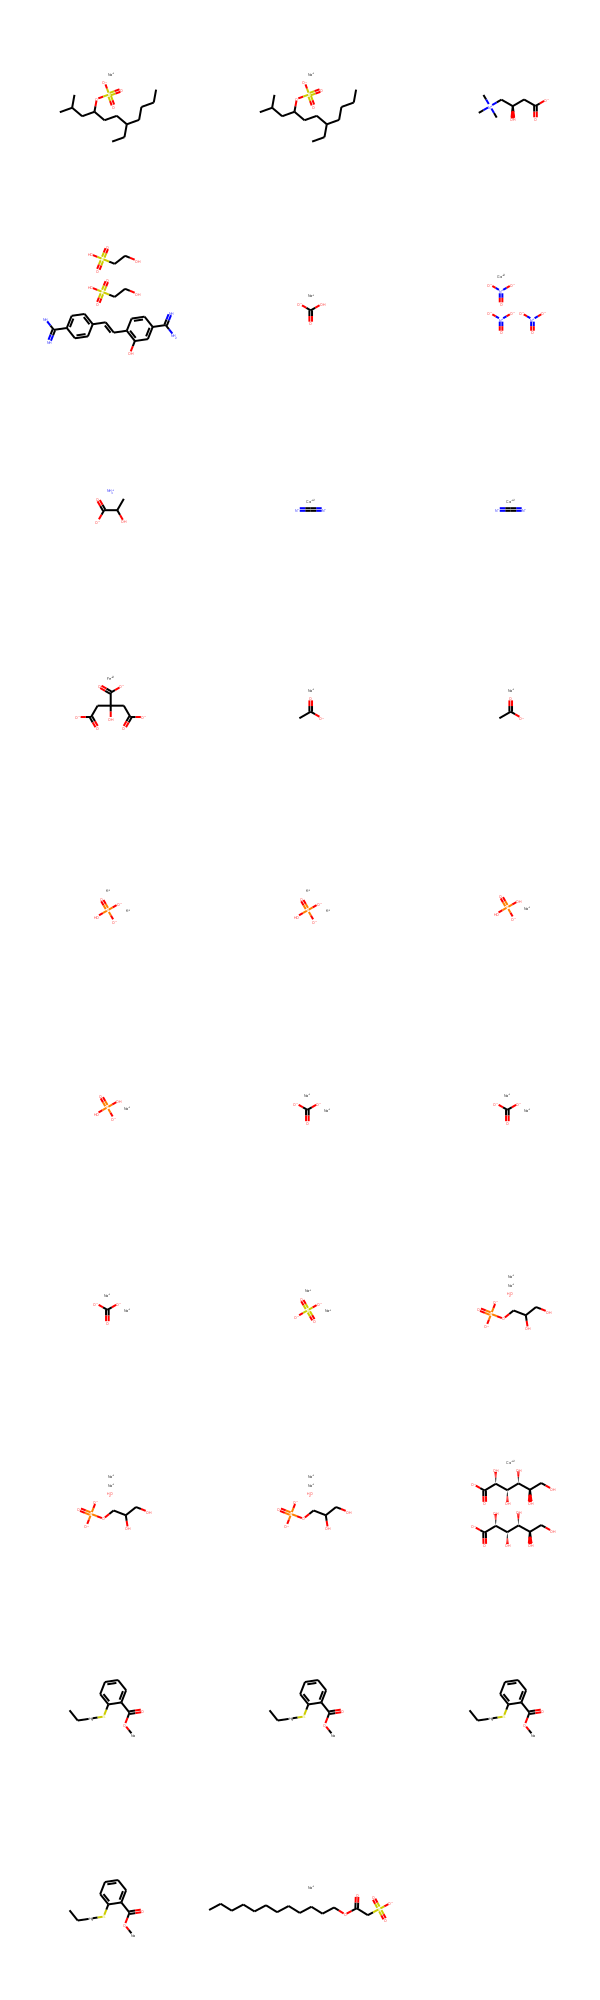

In [60]:
c.rollback()
cursor.execute("select m.id, mol_to_pkl(rdmol) from drugbank.name n join drugbank.molecule m on n.molecule_id = m.id where n.name like '%salt%'")
hits = [Chem.Mol(pklb.tobytes()) for id, pklb in cursor.fetchall()]
Draw.MolsToGridImage(hits)

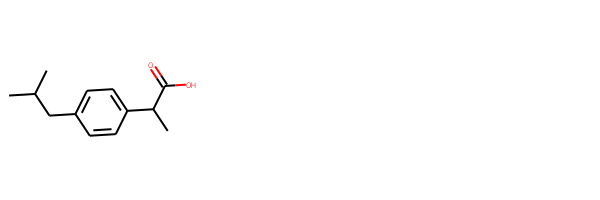

In [63]:
c.rollback()
cursor.execute("select m.id, mol_to_pkl(rdmol) from drugbank.name n join drugbank.molecule m on n.molecule_id = m.id where n.name like '%Ibuprofen%'")
hits = [Chem.Mol(pklb.tobytes()) for id, pklb in cursor.fetchall()]
Draw.MolsToGridImage(hits)

In [42]:
drugbank[666].GetProp('GENERIC_NAME')

'Propantheline'

In [44]:
groups_columns = ()

In [45]:
products_columns = ()